In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy import stats

In [ ]:
!pip install tensorflow-gpu==2.3.0

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
file_csv = '/content/drive/My Drive/CODIGOS/Pola-Data_BrewingDataCup2020/DATA/full_clientes_venta.csv'
full_clientes_venta = pd.read_csv(file_csv)
full_clientes_venta

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,Regional2,Gerencia2,SubCanal2,Categoria,Nevera
0,2019,5,10,1,1,1,12,0.112229,-30.590603,900.328567,1,3,1,2,1
1,2019,5,10,1,2,2,10,0.021734,0.000000,149.184463,1,3,1,2,1
2,2019,5,10,2,3,2,10,0.043469,0.000000,359.625828,1,3,1,2,1
3,2019,5,10,1,1,2,16,0.026345,-31.065261,134.748399,1,3,1,2,1
4,2019,5,10,1,4,2,10,0.086938,0.000000,496.901005,1,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406111,2020,8,20577,3,39,2,10,0.039122,0.000000,544.150314,1,8,3,2,0
1406112,2020,7,20580,1,38,2,10,0.000000,0.000000,0.000000,1,10,5,6,0
1406113,2020,7,20580,3,39,2,10,0.058683,0.000000,759.218996,1,10,5,6,0
1406114,2020,9,20580,1,38,2,10,0.000000,0.000000,0.000000,1,10,5,6,0


In [9]:
clientes_estructura = pd.read_csv("/content/drive/My Drive/CODIGOS/Pola-Data_BrewingDataCup2020/DATA/Input1_clientes_estructura.csv", sep=";")
clientes_estructura

,Cliente,Regional2,Gerencia2,SubCanal2,Categoria,Nevera
0,1,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
1,2,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
2,3,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
3,4,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,1
4,5,Regional 1,Gerencia_1,Subcanal_1,Categoria_2,1
...,...,...,...,...,...,...
20916,20917,Regional 1,Gerencia_1,Subcanal_31,Categoria_2,0
20917,20918,Regional 1,Gerencia_4,Subcanal_31,Categoria_1,0
20918,20919,Regional 1,Gerencia_9,Subcanal_31,Categoria_1,0
20919,20920,Regional 1,Gerencia_10,Subcanal_31,Categoria_1,0


In [12]:
clientes_estructura.isnull().sum()*100/clientes_estructura.shape[0]

Cliente      0.0
Regional2    0.0
Gerencia2    0.0
SubCanal2    0.0
Categoria    0.0
Nevera       0.0
dtype: float64

In [13]:
full_clientes_venta.isnull().sum()*100/full_clientes_venta.shape[0]

Año                 0.0
Mes                 0.0
Cliente             0.0
SegmentoPrecio2     0.0
Marca2              0.0
Cupo2               0.0
CapacidadEnvase2    0.0
Volumen             0.0
disc                0.0
nr                  0.0
Regional2           0.0
Gerencia2           0.0
SubCanal2           0.0
Categoria           0.0
Nevera              0.0
dtype: float64

In [14]:
cluster_data = full_clientes_venta[["SegmentoPrecio2", "Marca2", "Cupo2", "CapacidadEnvase2","Gerencia2", "SubCanal2", "Categoria", "Nevera"]].copy()
cluster_data

,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Gerencia2,SubCanal2,Categoria,Nevera
0,1,1,1,12,3,1,2,1
1,1,2,2,10,3,1,2,1
2,2,3,2,10,3,1,2,1
3,1,1,2,16,3,1,2,1
4,1,4,2,10,3,1,2,1
...,...,...,...,...,...,...,...,...
1406111,3,39,2,10,8,3,2,0
1406112,1,38,2,10,10,5,6,0
1406113,3,39,2,10,10,5,6,0
1406114,1,38,2,10,10,5,6,0


In [16]:
!pip install kmodes

In [17]:
from kmodes.kmodes import KModes

In [18]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(cluster_data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5380333.0


In [19]:
fitClusters_cao


array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [20]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = cluster_data.columns
clusterCentroidsDf

,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Gerencia2,SubCanal2,Categoria,Nevera
0,1,1,2,10,10,3,2,1
1,1,5,1,10,8,1,3,0


In [29]:
cost = []

num_min = 1
num_max = 10

for num_clusters in list(range(num_min,num_max)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(cluster_data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5865061.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5380333.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 74224, cost: 5060313.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 71463, cost: 4933888.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 138904, cost: 4758208.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 188915, cost: 4528602.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 190120, cost: 4477783.0
Init: initializing centroids
Init: initializing clusters
Sta

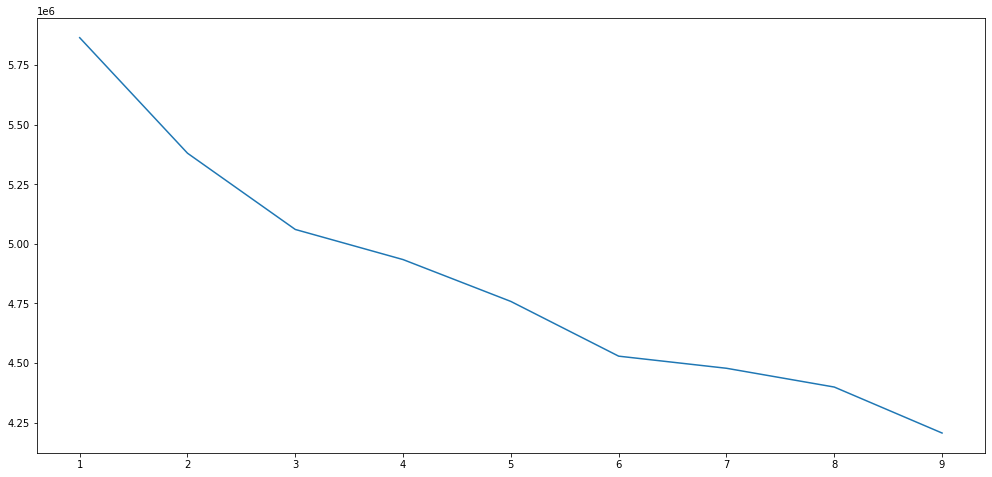

In [33]:
y = np.array([i for i in range(num_min,num_max,1)])
fig = plt.figure(figsize =(17, 8)) 
plt.plot(y,cost)

In [35]:
cost = []

num_min = 1
num_max = 10

for num_clusters in list(range(num_min,num_max)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    kmode.fit_predict(cluster_data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5865061.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5407735.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 234689, cost: 5136013.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 287677, cost: 4744137.0
Run 1, iteration: 2/100, moves: 30235, cost: 4744137.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 470629, cost: 4601346.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 314987, cost: 4680669.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 473375, cost: 4595894.0
Run

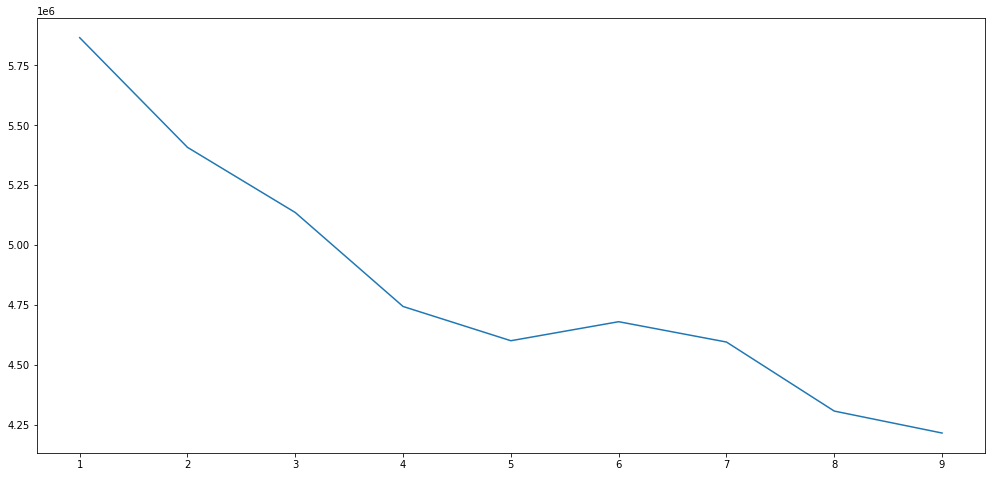

In [36]:
y = np.array([i for i in range(num_min,num_max,1)])
fig = plt.figure(figsize =(17, 8)) 
plt.plot(y,cost)